In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import scipy.stats as st
import sklearn 
import sklearn.datasets
import sklearn.metrics as metrics 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.cross_validation import StratifiedKFold
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.feature_selection import mutual_info_classif
from scipy import stats

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

In [3]:
Data_2017 = pd.read_excel("PERM_Disclosure_Data_FY17.xlsx")

In [4]:
df = Data_2017.copy()

In [5]:
#DROP WITHRAWN FROM CASE_STATUS
df = df[df['CASE_STATUS'] != 'Withdrawn']

In [6]:
#COLUMNS I WANT...so far
df = df[['CASE_STATUS', 'EMPLOYER_CITY','EMPLOYER_STATE','EMPLOYER_NUM_EMPLOYEES','EMPLOYER_YR_ESTAB','AGENT_FIRM_NAME',
        'AGENT_STATE','PW_SOC_CODE','PW_LEVEL_9089','PW_AMOUNT_9089','JOB_INFO_EDUCATION','FOREIGN_WORKER_INFO_EDUCATION','FW_INFO_YR_REL_EDU_COMPLETED',
        'COUNTRY_OF_CITIZENSHIP','CLASS_OF_ADMISSION','RI_EMPLOYER_WEB_POST_TO','RI_EMPLOYER_WEB_POST_FROM']]

In [7]:
df.shape

(94022, 17)

In [8]:
df.describe()

,EMPLOYER_NUM_EMPLOYEES,EMPLOYER_YR_ESTAB,FW_INFO_YR_REL_EDU_COMPLETED
count,9.399600e+04,93974.000000,85026.000000
mean,3.170620e+04,1985.173984,2003.861195
std,2.167113e+06,42.160162,90.906734
min,0.000000e+00,0.000000,0.000000
25%,7.200000e+01,1981.000000,2004.000000
50%,1.321500e+03,1997.000000,2008.000000
75%,1.850000e+04,2005.000000,2012.000000
max,6.640052e+08,2017.000000,9999.000000


In [9]:
df.dtypes

CASE_STATUS                              object
EMPLOYER_CITY                            object
EMPLOYER_STATE                           object
EMPLOYER_NUM_EMPLOYEES                  float64
EMPLOYER_YR_ESTAB                       float64
AGENT_FIRM_NAME                          object
AGENT_STATE                              object
PW_SOC_CODE                              object
PW_LEVEL_9089                            object
PW_AMOUNT_9089                           object
JOB_INFO_EDUCATION                       object
FOREIGN_WORKER_INFO_EDUCATION            object
FW_INFO_YR_REL_EDU_COMPLETED            float64
COUNTRY_OF_CITIZENSHIP                   object
CLASS_OF_ADMISSION                       object
RI_EMPLOYER_WEB_POST_TO          datetime64[ns]
RI_EMPLOYER_WEB_POST_FROM        datetime64[ns]
dtype: object

In [10]:
#FORMAT COLUMNS
#LOWER CASE 
#REMOVE SPECIAL CHARS
#WAGE IS CONVERTED FROM OBJECT TO FLOAT AND REMOVES ',' CHARS

In [11]:
df['CASE_STATUS'] = df['CASE_STATUS'].astype(str).str.lower().str.replace('[^A-Za-z\s]+', '')

In [12]:
df['EMPLOYER_CITY'] = df['EMPLOYER_CITY'].astype(str).str.lower().str.replace('[^A-Za-z\s]+', '')

In [13]:
df['EMPLOYER_STATE'] = df['EMPLOYER_STATE'].astype(str).str.lower().str.replace('[^A-Za-z\s]+', '')

In [14]:
df['EMPLOYER_NUM_EMPLOYEES'].sort_values(ascending = False)

69472    664005241.0
83115      3414000.0
96377      3414000.0
96342      3414000.0
90857      3414000.0
6706       2308000.0
50230      2308000.0
7192       1400000.0
23374      1400000.0
5199       1400000.0
26802      1400000.0
5175       1400000.0
44533      1400000.0
24780      1400000.0
24789      1400000.0
23368      1400000.0
5170       1400000.0
28243      1400000.0
36547      1400000.0
13230      1400000.0
44009      1400000.0
6337       1400000.0
27890      1400000.0
33467      1400000.0
3729       1400000.0
4911       1400000.0
23382      1400000.0
17768      1400000.0
44984      1400000.0
25957      1400000.0
36487      1400000.0
36482      1400000.0
36474      1400000.0
64182      1400000.0
4564       1400000.0
4547       1400000.0
82259      1400000.0
83836      1400000.0
4874       1400000.0
33038      1400000.0
49553      1400000.0
13050      1400000.0
52470      1400000.0
7503       1400000.0
45511      1400000.0
3409       1400000.0
50487      1400000.0
16890      14

In [15]:
df['EMPLOYER_YR_ESTAB'].sort_values(ascending = False)

88108    2017.0
80974    2017.0
83065    2017.0
91017    2017.0
87667    2017.0
60771    2017.0
90724    2017.0
96605    2017.0
95418    2017.0
68606    2017.0
75609    2017.0
73420    2017.0
91557    2017.0
96951    2017.0
76589    2017.0
72087    2017.0
60739    2017.0
92540    2017.0
87455    2017.0
79988    2017.0
75226    2017.0
58447    2017.0
97345    2017.0
92446    2017.0
86524    2017.0
44525    2016.0
3964     2016.0
76966    2016.0
85001    2016.0
12627    2016.0
54681    2016.0
71396    2016.0
80833    2016.0
85401    2016.0
21843    2016.0
47928    2016.0
94590    2016.0
38583    2016.0
86127    2016.0
25625    2016.0
91655    2016.0
95731    2016.0
51973    2016.0
88129    2016.0
16268    2016.0
51985    2016.0
56100    2016.0
76955    2016.0
46532    2016.0
56769    2016.0
92658    2016.0
81598    2016.0
67641    2016.0
14151    2016.0
87379    2016.0
84835    2016.0
76980    2016.0
56763    2016.0
76011    2016.0
83211    2016.0
85185    2016.0
60961    2016.0
62119   

In [16]:
df['PW_AMOUNT_9089'].astype(str).str.replace(',','').apply(float).sort_values(ascending = False)

83309    9493100.00
22186    7149000.00
64125    5632600.00
73019    3003500.00
43324     823389.00
96539     768353.00
68227     284627.00
44465     274685.00
82558     273520.00
51749     262413.00
34799     257712.00
60165     253698.00
25908     251576.00
28436     251576.00
35935     249891.00
33051     249891.00
37316     247217.00
24470     244400.00
52835     241925.00
58372     241925.00
52125     241842.00
55101     241134.00
90389     240406.00
5776      239724.00
90978     239678.00
43710     239616.00
43708     239616.00
32574     239304.00
30943     239304.00
21425     239138.00
88140     238534.00
73271     236704.00
89750     235310.00
59557     233355.00
86804     233355.00
14349     233355.00
55874     233355.00
94075     232211.00
89822     232211.00
7819      231920.00
73519     231899.00
58341     231899.00
56893     231899.00
86173     231899.00
68006     231899.00
76406     231899.00
88926     231899.00
82210     231899.00
58478     231899.00
97021     231899.00


In [17]:
df['AGENT_FIRM_NAME'] = df['AGENT_FIRM_NAME'].astype(str).str.lower().str.replace('[^A-Za-z\s]+', '')

In [18]:
df['EMPLOYER_CITY'] = df['EMPLOYER_CITY'].astype(str).str.lower().str.replace('[^A-Za-z\s]+', '')

In [19]:
df['PW_LEVEL_9089'] = df['PW_LEVEL_9089'].astype(str).str.lower().str.replace('[^A-Za-z\s]+','')

In [20]:
#EXPLORE EACH COLUMN

In [21]:
df['CASE_STATUS'].value_counts()

certifiedexpired    45529
certified           42080
denied               6413
Name: CASE_STATUS, dtype: int64

In [22]:
df['EMPLOYER_CITY'].value_counts().sort_values(ascending = False)

new york                 4441
college station          4228
santa clara              2507
mountain view            2467
san francisco            2291
seattle                  2061
redmond                  2057
san jose                 2055
sunnyvale                1801
chicago                  1772
plano                    1626
houston                  1204
cupertino                1120
san diego                1045
los angeles              1038
edison                   1011
philadelphia              980
palo alto                 883
miami                     798
troy                      784
san antonio               783
menlo park                767
irving                    756
dallas                    740
atlanta                   698
tampa                     678
boston                    669
redwood shores            556
jersey city               507
charlotte                 473
columbus                  461
fremont                   447
alpharetta                438
hopkins   

In [23]:
df['EMPLOYER_NUM_EMPLOYEES'].value_counts().sort_values(ascending = False)

35000.0      2393
40000.0      1778
230800.0     1764
61814.0      1658
54000.0      1312
63000.0      1303
5.0          1130
3.0           983
4.0           921
10.0          905
60000.0       851
6.0           838
2.0           791
5000.0        748
26800.0       711
7.0           706
8.0           659
1.0           656
12.0          653
15.0          648
20.0          637
9000.0        586
19000.0       581
9.0           565
9770.0        528
116000.0      521
21300.0       513
40.0          504
30.0          488
35.0          458
25.0          449
16.0          438
45.0          425
10000.0       408
18.0          401
22500.0       396
11.0          395
13.0          390
136000.0      390
92600.0       390
48.0          388
22.0          386
14000.0       381
12000.0       367
14.0          367
18500.0       361
23.0          360
60.0          353
500.0         352
8000.0        350
24.0          341
200.0         340
6000.0        339
600.0         334
100.0         326
17.0      

In [24]:
df['EMPLOYER_YR_ESTAB'].value_counts().sort_values(ascending = False)

1994.0    5617
1999.0    4465
1998.0    4169
2004.0    3257
2012.0    2721
2000.0    2635
2006.0    2620
2011.0    2609
2008.0    2581
2010.0    2574
2005.0    2541
2007.0    2505
2009.0    2289
1997.0    2233
1996.0    2201
2003.0    2182
1975.0    2116
1977.0    1929
2002.0    1799
2014.0    1762
2013.0    1743
2001.0    1685
1968.0    1638
1995.0    1591
1989.0    1537
1993.0    1508
1981.0    1451
1988.0    1431
1984.0    1298
2015.0    1241
1990.0     975
1986.0     941
1991.0     927
1979.0     847
1958.0     805
1983.0     756
1982.0     671
1987.0     618
1985.0     576
1973.0     569
1992.0     568
2016.0     534
1980.0     513
1976.0     497
1969.0     462
1974.0     445
1838.0     387
1978.0     383
1962.0     333
1963.0     333
1911.0     330
1919.0     325
1946.0     311
1908.0     296
1970.0     262
1965.0     261
1972.0     254
1904.0     251
1971.0     220
1939.0     217
1967.0     215
1850.0     214
1869.0     205
1926.0     177
1897.0     175
1947.0     169
1959.0    

In [25]:
df['AGENT_FIRM_NAME'].value_counts().sort_values(ascending = False)

fragomen del rey bernsen  loewy llp                    15409
nan                                                    11527
berry appleman  leiden llp                              4970
erickson immigration group                              1124
fakhoury law group                                      1066
seyfarth shaw llp                                       1008
ogletree deakins nash smoak  stewart pc                  933
chugh llp                                                759
global labor solutions llc                               712
tafapolsky and smith llp                                 623
ey law llp                                               595
ogletree deakins                                         573
global immigration associates pc                         564
murthy law firm                                          494
fragomen del rey bernsen and loewy llp                   482
morgan lewis  bockius llp                                415
pearl law group         

In [26]:
df['AGENT_STATE'].value_counts().sort_values(ascending = False)

CA    21262
NY     9964
TX     6876
MA     5724
GA     5245
MI     4346
IL     4092
VA     3288
NJ     3088
FL     2800
AZ     1922
PA     1685
MD     1638
DC     1612
OH     1363
NC     1353
WA     1107
MN      834
CO      720
CT      545
MO      533
NE      290
WI      265
TN      261
LA      232
SC      232
OR      229
UT      200
OK      132
IN      111
AL      107
GU      100
KS       95
ME       91
IA       84
KY       82
VT       68
NM       50
RI       49
HI       48
AR       44
NH       36
MS       31
PR       25
NV       22
MP        7
ID        6
DE        6
SD        4
MT        3
AK        3
ND        3
VI        1
Name: AGENT_STATE, dtype: int64

In [27]:
df['CLASS_OF_ADMISSION'].value_counts().sort_values(ascending = False)

H-1B          64887
L-1            5771
F-1            5635
Not in USA     3582
TN             1672
E-2            1223
B-2            1037
J-1             374
E-3             330
EWI             327
F-2             324
O-1             263
H-4             237
H-2B            216
B-1             193
Parolee         174
E-1             172
L-2             166
TPS             125
H-1B1           112
P-1              65
H-2A             58
A1/A2            50
J-2              48
G-4              32
R-1              23
P-3              19
I                19
VWT              16
M-1              14
H-3              14
C-1              14
H-1A             13
G-5               8
VWB               6
O-2               6
R-2               5
TD                4
A-3               4
M-2               3
O-3               3
G-1               3
P-2               2
C-3               2
P-4               2
N                 1
T-1               1
D-1               1
U-1               1
V-1               1


In [28]:
df['PW_AMOUNT_9089'].sort_values(ascending = False)

17380    99,988.00
78122    99,986.00
14234    99,986.00
39614    99,986.00
26884    99,972.00
40211    99,972.00
3018     99,972.00
72377    99,965.00
29342    99,965.00
82063    99,965.00
10306    99,965.00
43706    99,963.00
28511    99,963.00
25763    99,961.00
55167    99,960.00
55875    99,960.00
41762    99,960.00
37378    99,960.00
62382    99,960.00
97536    99,960.00
7079     99,960.00
44846    99,960.00
62358    99,960.00
38161    99,953.00
51459    99,953.00
51466    99,953.00
74572    99,953.00
16776    99,944.00
46405    99,944.00
77960    99,944.00
51370    99,944.00
50516    99,944.00
83963    99,944.00
97322    99,944.00
2993     99,944.00
44593    99,944.00
64976    99,944.00
56318    99,944.00
3861     99,944.00
2793     99,939.00
19502    99,939.00
20343    99,939.00
24365    99,939.00
17688    99,939.00
17131    99,939.00
20360    99,939.00
17699    99,939.00
5349     99,939.00
20357    99,939.00
20367    99,939.00
5327     99,939.00
25462    99,939.00
20369    99,

In [29]:
df['PW_LEVEL_9089'].value_counts().sort_values(ascending = False)

level ii     29461
level iv     21611
level i      19027
level iii    17481
nan           6442
Name: PW_LEVEL_9089, dtype: int64

In [30]:
#SOME ANALYSIS

In [31]:
df.groupby(['COUNTRY_OF_CITIZENSHIP'])['COUNTRY_OF_CITIZENSHIP'].count() 

COUNTRY_OF_CITIZENSHIP
AFGHANISTAN                             8
ALBANIA                                45
ALGERIA                                12
ANDORRA                                 1
ANGOLA                                  4
ANTIGUA AND BARBUDA                     2
ARGENTINA                             249
ARMENIA                                46
AUSTRALIA                             525
AUSTRIA                                55
AZERBAIJAN                             10
BAHAMAS                                32
BAHRAIN                                 5
BANGLADESH                            312
BARBADOS                               11
BELARUS                                96
BELGIUM                                69
BELIZE                                  9
BENIN                                   6
BERMUDA                                 1
BHUTAN                                  2
BOLIVIA                                54
BOSNIA AND HERZEGOVINA                 12
BOTSWANA   

In [32]:
casePercentByFirm = df.groupby(['CASE_STATUS','AGENT_FIRM_NAME'])['CASE_STATUS'].count() / df.groupby(['AGENT_FIRM_NAME'])['AGENT_FIRM_NAME'].count() 

In [33]:
casePercentByFirm

CASE_STATUS  AGENT_FIRM_NAME                                   
certified     n dreamy draw drive                                  1.000000
              old york road                                        1.000000
             a biggar law llc                                      1.000000
             aazarmehr law group                                   1.000000
             abad constancio  mallonga llc                         1.000000
             abrams  abrams llp                                    0.444444
             abrams and abrams llp                                 1.000000
             access immigration llc                                1.000000
             adam b king attorney at law pc                        1.000000
             ades law group pc                                     0.263158
             afa law group pc                                      1.000000
             aghnami law corporation                               0.333333
             ahluwalia l

In [34]:
casePercentByCitizenship = df.groupby(['CASE_STATUS','COUNTRY_OF_CITIZENSHIP'])['CASE_STATUS'].count() / df.groupby(['COUNTRY_OF_CITIZENSHIP'])['COUNTRY_OF_CITIZENSHIP'].count() 

In [35]:
df['COUNTRY_OF_CITIZENSHIP'].value_counts()>500

INDIA                                True
CHINA                                True
SOUTH KOREA                          True
CANADA                               True
MEXICO                               True
VIETNAM                              True
PHILIPPINES                          True
BRAZIL                               True
UNITED KINGDOM                       True
TAIWAN                               True
PAKISTAN                             True
VENEZUELA                            True
IRAN                                 True
FRANCE                               True
NEPAL                                True
JAPAN                                True
RUSSIA                               True
TURKEY                               True
GERMANY                              True
ITALY                                True
AUSTRALIA                            True
COLOMBIA                            False
ISRAEL                              False
UKRAINE                           

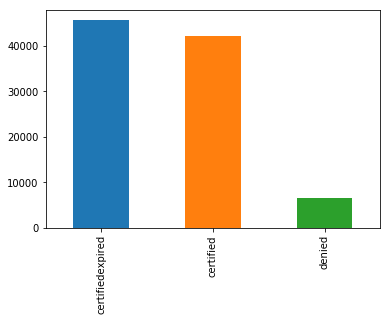

In [36]:
df['CASE_STATUS'].value_counts().plot(kind="bar")

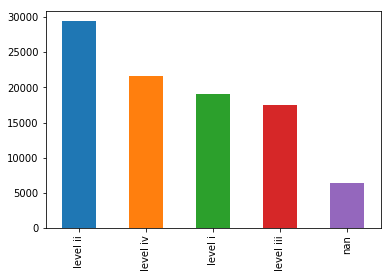

In [37]:
df['PW_LEVEL_9089'].value_counts().plot(kind="bar")

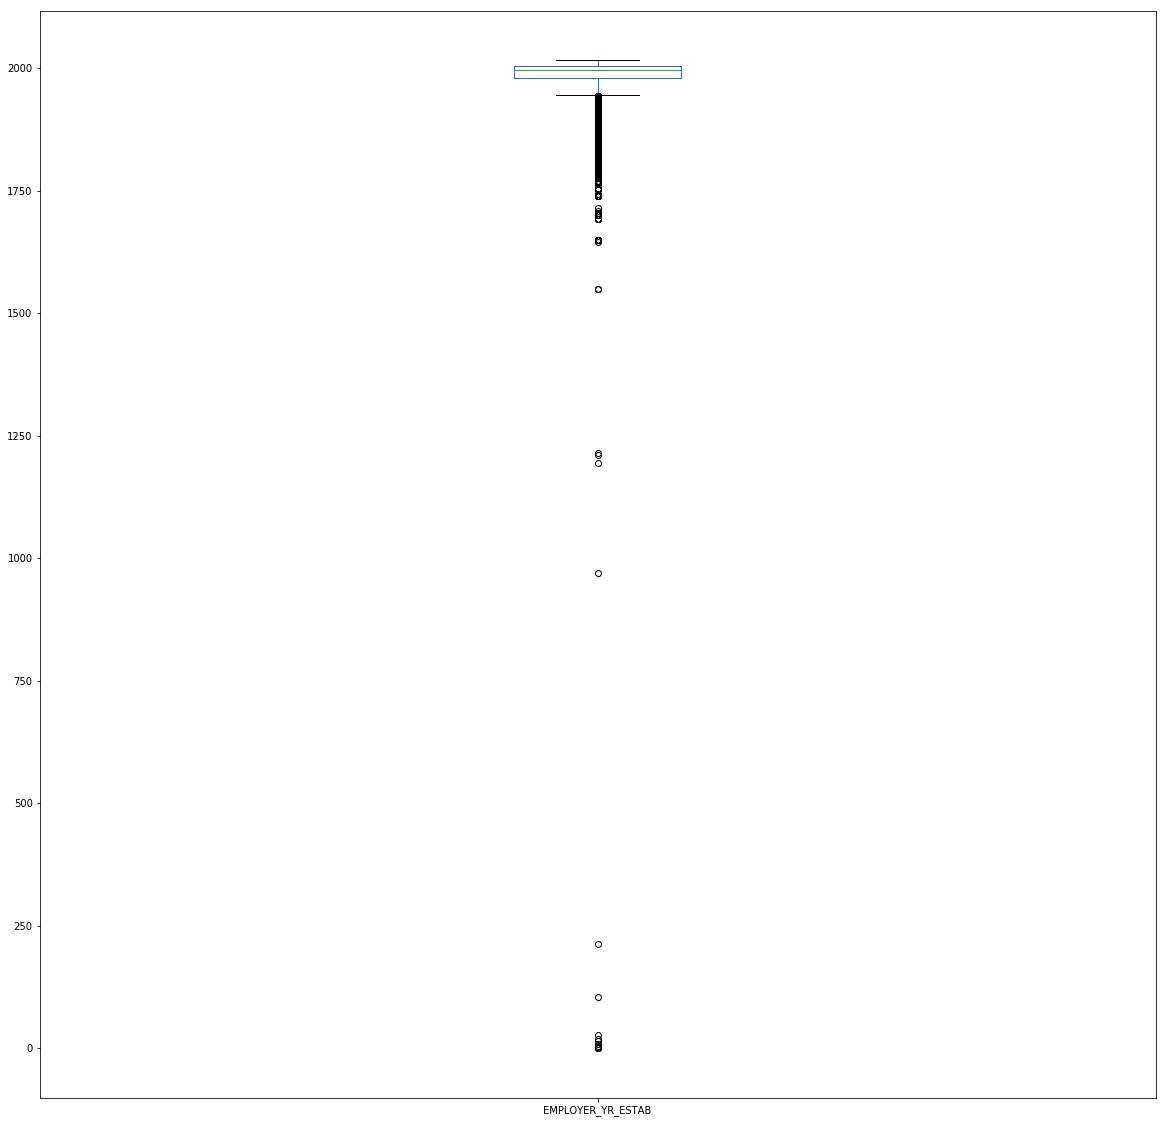

In [38]:
df['EMPLOYER_YR_ESTAB'].plot.box(figsize=(20,20))

In [39]:
df.groupby(['CASE_STATUS','AGENT_FIRM_NAME'])['CASE_STATUS'].count().sort_values(ascending=False)

CASE_STATUS       AGENT_FIRM_NAME                                           
certifiedexpired  fragomen del rey bernsen  loewy llp                           7853
certified         fragomen del rey bernsen  loewy llp                           7354
                  nan                                                           5168
certifiedexpired  nan                                                           5118
certified         berry appleman  leiden llp                                    2505
certifiedexpired  berry appleman  leiden llp                                    2380
denied            nan                                                           1241
certified         erickson immigration group                                     664
certifiedexpired  fakhoury law group                                             542
                  seyfarth shaw llp                                              525
certified         fakhoury law group                                     

In [40]:
#CREATE NEW BINARY VARIABLES

In [41]:
#BINARY FOR PW_LEVEL
pwLvlIndex = df.columns.get_loc('PW_LEVEL_9089')

df.insert(pwLvlIndex + 1, 'PW_LEVEL_1',value = 0)
df.insert(pwLvlIndex + 2, 'PW_LEVEL_2',value = 0)
df.insert(pwLvlIndex + 3, 'PW_LEVEL_3',value = 0)
df.insert(pwLvlIndex + 4, 'PW_LEVEL_4',value = 0)


In [43]:
def pwLvlBin(df):
    if df['PW_LEVEL_9089'] == "level i":
        df['PW_LEVEL_1'] = 1 
    elif df['PW_LEVEL_9089'] == "level ii":
        df['PW_LEVEL_2'] == 1
    elif df['PW_LEVEL_9089'] == "level iii":
        df['PW_LEVEL_3'] == 1
    elif df['PW_LEVEL_9089'] == "level iv":
        df['PW_LEVEL_4'] == 1
    return 

In [44]:
df['PW_LEVEL_9089'].value_counts()

level ii     29461
level iv     21611
level i      19027
level iii    17481
nan           6442
Name: PW_LEVEL_9089, dtype: int64

In [73]:
#Create Wage Categories
df['PW_LEVEL_9089'].replace('level i',1,inplace=True)
df['PW_LEVEL_9089'].replace('level ii',2,inplace=True)
df['PW_LEVEL_9089'].replace('level iii',3,inplace=True)
df['PW_LEVEL_9089'].replace('level iv',4,inplace=True)

In [74]:
#Categorize outcomes to binary classification
df['CASE_STATUS'].replace(['Certified','Certified-Expired'],1,inplace=True)
df['CASE_STATUS'].replace(['Withdrawn','Denied'],0,inplace=True)

In [75]:
#Create Education Categories
df['FOREIGN_WORKER_INFO_EDUCATION'].replace(['None','High School'],0,inplace=True)
df['FOREIGN_WORKER_INFO_EDUCATION'].replace(['Associate\'s'],1,inplace=True)
df['FOREIGN_WORKER_INFO_EDUCATION'].replace(['Bachelor\'s'],2,inplace=True)
df['FOREIGN_WORKER_INFO_EDUCATION'].replace(['Master\'s','Other'],3,inplace=True)
df['FOREIGN_WORKER_INFO_EDUCATION'].replace(['Doctorate'],4,inplace=True)

In [76]:
daysAdvertisedEmployerWebsite = (df['RI_EMPLOYER_WEB_POST_TO']-df['RI_EMPLOYER_WEB_POST_FROM']).dt.days
columnPos = df.columns.get_loc("RI_EMPLOYER_WEB_POST_FROM") + 1
df.insert(columnPos,'daysAdvertisedEmployerWebsite', daysAdvertisedEmployerWebsite)


ValueError: cannot insert daysAdvertisedEmployerWebsite, already exists

In [77]:
df.columns.values.tolist()

['CASE_STATUS',
 'EMPLOYER_CITY',
 'EMPLOYER_STATE',
 'EMPLOYER_NUM_EMPLOYEES',
 'EMPLOYER_YR_ESTAB',
 'AGENT_FIRM_NAME',
 'AGENT_STATE',
 'PW_SOC_CODE',
 'PW_LEVEL_9089',
 'PW_LEVEL_1',
 'PW_LEVEL_2',
 'PW_LEVEL_3',
 'PW_LEVEL_4',
 'PW_AMOUNT_9089',
 'JOB_INFO_EDUCATION',
 'FOREIGN_WORKER_INFO_EDUCATION',
 'FW_INFO_YR_REL_EDU_COMPLETED',
 'COUNTRY_OF_CITIZENSHIP',
 'CLASS_OF_ADMISSION',
 'RI_EMPLOYER_WEB_POST_TO',
 'RI_EMPLOYER_WEB_POST_FROM',
 'daysAdvertisedEmployerWebsite']

In [78]:
df

,CASE_STATUS,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_NUM_EMPLOYEES,EMPLOYER_YR_ESTAB,AGENT_FIRM_NAME,AGENT_STATE,PW_SOC_CODE,PW_LEVEL_9089,PW_LEVEL_1,PW_LEVEL_2,PW_LEVEL_3,PW_LEVEL_4,PW_AMOUNT_9089,JOB_INFO_EDUCATION,FOREIGN_WORKER_INFO_EDUCATION,FW_INFO_YR_REL_EDU_COMPLETED,COUNTRY_OF_CITIZENSHIP,CLASS_OF_ADMISSION,RI_EMPLOYER_WEB_POST_TO,RI_EMPLOYER_WEB_POST_FROM,daysAdvertisedEmployerWebsite
11,certifiedexpired,industry,ca,50.0,1995.0,law offices of jonathan liang,CA,15-1142,2,0,0,0,0,"68,078.00",Master's,3.0,2003.0,TAIWAN,NaN,2016-04-22,2016-04-05,17.0
12,certifiedexpired,coral gables,fl,14.0,1981.0,nan,NaN,13-1071,1,0,0,0,0,"36,566.00",Bachelor's,2.0,1991.0,VENEZUELA,H-1B1,NaT,NaT,NaN
13,certifiedexpired,boston,ma,1149.0,1997.0,mitchell williams law firm,AR,15-1132,3,0,0,0,0,"112,632.00",Master's,3.0,2009.0,INDIA,H-1B,NaT,NaT,NaN
14,certifiedexpired,bentonville,ar,61.0,1998.0,the khosla immigration law group pc,OH,15-1132,2,0,0,0,0,"73,736.00",Master's,3.0,2004.0,INDIA,H-1B,2016-06-01,2016-05-02,30.0
15,certifiedexpired,bentonville,ar,61.0,1998.0,the khosla immigration law group pc,OH,15-1132,2,0,0,0,0,"73,736.00",Master's,3.0,2001.0,INDIA,H-1B,2016-06-01,2016-05-02,30.0
16,certifiedexpired,san francisco,ca,222.0,1999.0,berry appleman leiden llp,CA,11-3021,2,0,0,0,0,"145,725.00",Master's,3.0,2005.0,INDIA,H-1B,NaT,NaT,NaN
17,certifiedexpired,herndon,va,676.0,2000.0,piston carpenter pc,MI,15-1132,3,0,0,0,0,"108,139.00",Master's,3.0,2013.0,NEPAL,H-1B,2016-02-22,2016-02-05,17.0
18,certifiedexpired,minneapolis,mn,58.0,2001.0,fredrikson byron pa,MN,15-1122,1,0,0,0,0,"67,995.00",Bachelor's,3.0,2013.0,INDIA,H-1B,2016-05-12,2016-05-05,7.0
19,certifiedexpired,menlo park,ca,9454.0,2004.0,berry appleman leiden llp,CA,13-1161,4,0,0,0,0,"110,115.00",Bachelor's,2.0,2007.0,INDIA,H-1B,NaT,NaT,NaN
20,certifiedexpired,menlo park,ca,9454.0,2004.0,berry appleman leiden llp,CA,15-1121,4,0,0,0,0,"121,222.00",Master's,3.0,2007.0,INDIA,H-1B,NaT,NaT,NaN


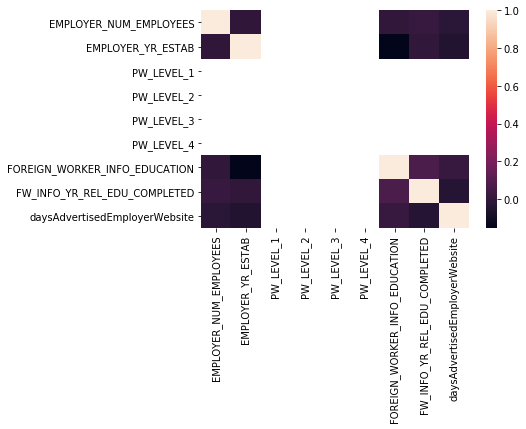

In [79]:
sns.heatmap(df.corr())
plt.show()

In [80]:
data = df[['CASE_STATUS','PW_LEVEL_9089','FOREIGN_WORKER_INFO_EDUCATION','daysAdvertisedEmployerWebsite']]

In [84]:
data.fillna(0,inplace = True)
data

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,CASE_STATUS,PW_LEVEL_9089,FOREIGN_WORKER_INFO_EDUCATION,daysAdvertisedEmployerWebsite
11,certifiedexpired,2,3.0,17.0
12,certifiedexpired,1,2.0,0.0
13,certifiedexpired,3,3.0,0.0
14,certifiedexpired,2,3.0,30.0
15,certifiedexpired,2,3.0,30.0
16,certifiedexpired,2,3.0,0.0
17,certifiedexpired,3,3.0,17.0
18,certifiedexpired,1,3.0,7.0
19,certifiedexpired,4,2.0,0.0
20,certifiedexpired,4,3.0,0.0


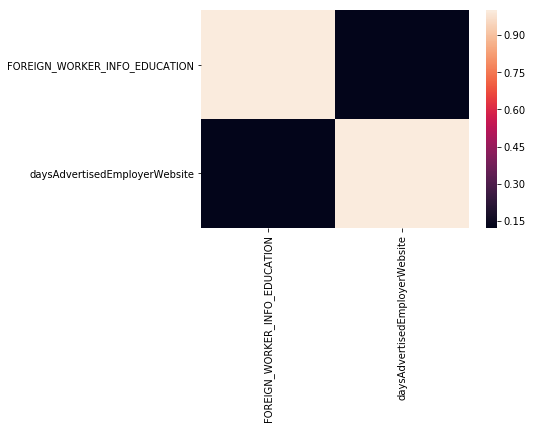

In [85]:
sns.heatmap(data.corr())
plt.show()

In [83]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [71]:
X_train.shape

(70516, 3)

In [72]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
coef = classifier.coef_[0]
print (coef)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [65]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

NotFittedError: This LogisticRegression instance is not fitted yet

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
daysAdvertisedFair = df['RECR_INFO_JOB_FAIR_TO'].sub(Data_2017['RECR_INFO_JOB_FAIR_FROM'])

In [ ]:
daysAvertisedCampus = df['RECR_INFO_ON_CAMPUS_RECR_TO'].sub(Data_2017['RECR_INFO_ON_CAMPUS_RECR_FROM'])

In [ ]:
daysAdvertisedJobBoard = df['RI_JOB_SEARCH_WEBSITE_TO'].sub(Data_2017['RI_JOB_SEARCH_WEBSITE_FROM']) 

In [ ]:
pd.DatetimeIndex(data2017Copy['RI_EMPLOYER_WEB_POST_TO']).month